In [2]:
from matplotlib import pyplot as plt
import numpy as np

ant_pat_db =[0.00,  0.00,  0.22,  0.44,  0.67,  1.11,  1.56,  2.00,  2.44,  2.89,  3.56,  4.22,
	 4.89,  5.56,  6.22,  6.89,  7.56,  8.22,  8.89,  9.78, 10.67, 11.56, 12.44, 13.33,
	14.44, 15.56, 16.67, 17.78, 18.89, 20.00, 21.33, 22.67, 24.00, 25.56, 27.33, 29.33,
	31.56]

print(len(ant_pat_db))


37


Text(0.5, 1.0, 'antenna patern db')

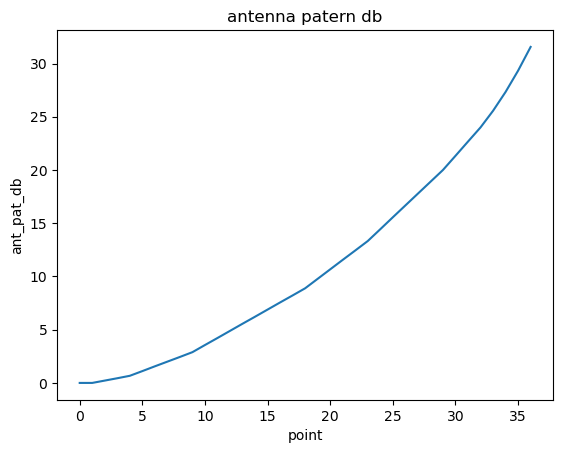

In [3]:
plt.plot(ant_pat_db)
plt.xlabel('point')
plt.ylabel('ant_pat_db')
plt.title('antenna patern db')

In [4]:
#C/A 코드란 GPS 위성에서 송신되는 코드로, 각각의 위성은 32개의 고유한 코드를 한 개씩 나누어 가지고 있다.
#각각의 코드는 1,023 chips 로 구성되어 초당 1.023MB의 속도로 전송되며, 이 코드의 순서는 1/1000초마다 반복된다.
#L1 주파수 (1,575.42MHz)는 항법 메세지와 SPS 코드신호를 운반한다.
# C/A코드(Coarse Aquisition)는 L1 반송파 위상에 변조되어 있다. 
# C/A코드는 반복되는 1MHz 의사 불규칙한 잡음(Pseudo Random Noise; PRN) 코드이다.
# 이 잡음과 같은 코드는 L1 반송파 신호에 변조되어 1MHz 주파수대역에 걸쳐 스펙트럼을 전파한다.
# C/A코드는 매1,023비트(1/1,000초)를 반복한다. 각 위성에 대하여 서로 다른 C/A코드 PRN이 있다.
# GPS위성은 종종 각각의 의사 불규칙 잡음 코드에 대한 유일한 식별자인 PRN 번호에 의하여 구별되기도 한다.
# L1 반송파의 변조된 C/A코드는 민간 SPS(standard positioning system)의 기본이다.

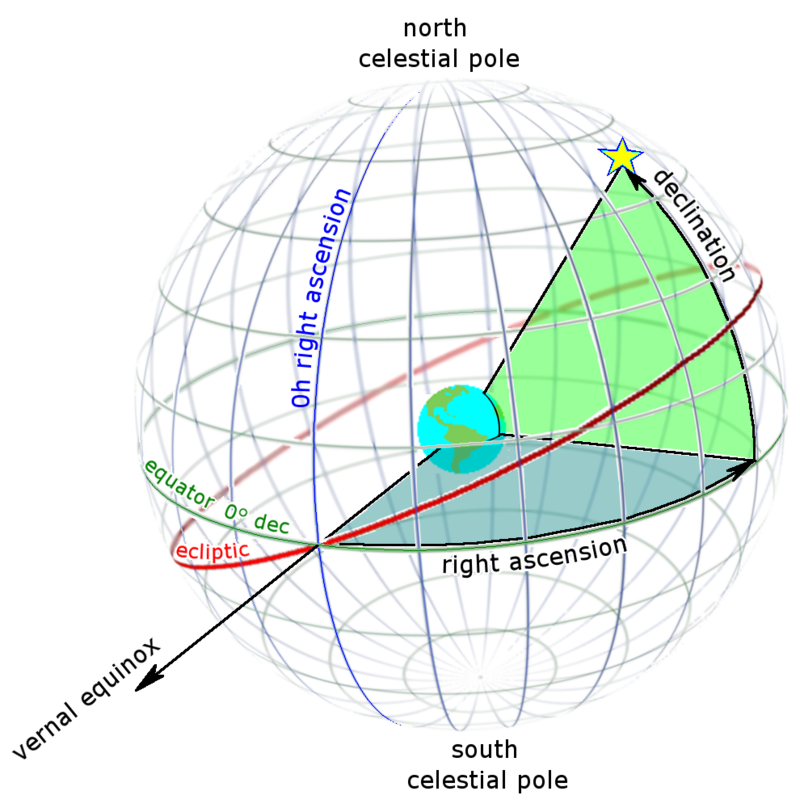

In [15]:
#GNSS ALMANAC YUMA format

# ******** Week 257 almanac for PRN-02 ********
# ID:                         02
# Health:                     000  # 000 OK status
# Eccentricity:               0.1611900330E-001 #이심률 원 궤도: e = 0
# Time of Applicability(s):  589824.0000
# Orbital Inclination(rad):   0.9677884791
# Rate of Right Ascen(r/s):  -0.7954617056E-008
# SQRT(A)  (m 1/2):           5153.663086
# Right Ascen at Week(rad):  -0.2970251194E+001
# Argument of Perigee(rad):  -1.220343510
# Mean Anom(rad):            -0.3050104706E+001
# Af0(s):                    -0.4692077637E-003 # Satellite clock correction bias (truncated), in seconds.
# Af1(s/s):                   0.7275957614E-011 # Satellite clock correction linear (truncated), in seconds per second.
# week:                        257


# Parameters:
# source - the source of the almanac (SEM, YUMA, user defined)
# prn - the PRN number
# svn - the SVN number
# week - the GPS week
# toa - the Time of Applicability
# sqa - the Square Root of Semi-Major Axis (m^1/2)
# ecc - the eccentricity
# inc - the inclination (rad)
# om0 - the geographic longitude of the orbital plane at the weekly epoch (rad)
# dom - the Rate of Right Ascension (rad/s)
# aop - the Argument of Perigee (rad)
# anom - the Mean Anomaly (rad)
# af0 - the Zeroth Order Clock Correction (s)
# af1 - the First Order Clock Correction (s/s)
# health - the Health status
# ura - the average URA
# config - the satellite configuration
from IPython.display import Image
Image("img/800px-Ra_and_dec_on_celestial_sphere.png")
#print("Right ascension (blue) and declination (green) as seen from outside the celestial sphere")

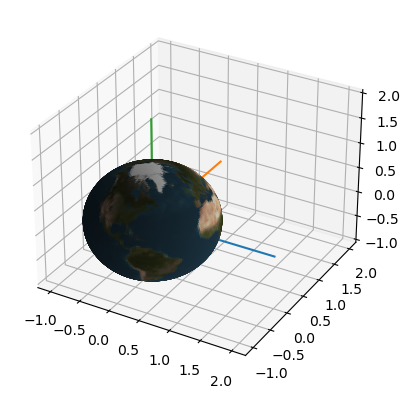

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# load bluemarble with PIL
bm = Image.open('bluemarble.jpg')
# it's big, so I'll rescale it, convert to array, and divide by 256 to get RGB values that matplotlib accept 


bm = np.array(bm.resize([int(d/10) for d in bm.size]))/256.
# coordinates of the image - don't know if this is entirely accurate, but probably close

lons = np.linspace(-180, 180, bm.shape[1]) * np.pi/180 
lats = np.linspace(-90, 90, bm.shape[0])[::-1] * np.pi/180 

# repeat code from one of the examples linked to in the question, except for specifying facecolors:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.outer(np.cos(lons), np.cos(lats)).T
y = np.outer(np.sin(lons), np.cos(lats)).T
z = np.outer(np.ones(np.size(lons)), np.sin(lats)).T
ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors = bm)
ax.plot([0,2],[0,0],[0,0])
ax.plot([0,0],[0,2],[0,0])
ax.plot([0,0],[0,0],[0,2])


sat = np.array([[3,  267.9,  21.7,  23559834.8,   9.5],
[4,  317.3,  30.1,  22797828.6,   8.3],
[18,  102.2,   1.1,  25764019.9,  21.9],
[26,  348.1,  70.0,  20284789.3,   5.3],
[27,  185.2,  25.7,  23035031.5,  10.1],
[28,   74.1,  43.7,  21747694.5,   7.5],
[29,   46.1,  20.1,  23675311.6,  11.9],
[31,   32.6,  59.4,  20803623.3,   5.9],
[32,  150.5,  21.6,  23356167.0,  11.8]])



plt.show()

In [2]:
import math

import pyproj

coords = [
  (37.4001100556,  -79.1539111111,  208.38),
  (37.3996955278,  -79.153841,  208.48),
  (37.3992233889,  -79.15425175,  208.18),

]

def gps_to_ecef_pyproj(lat, lon, alt):
    ecef = pyproj.Proj(proj='geocent', ellps='WGS84', datum='WGS84')
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)

    return x, y, z

def gps_to_ecef_custom(lat, lon, alt):
    rad_lat = lat * (math.pi / 180.0)
    rad_lon = lon * (math.pi / 180.0)

    a = 6378137.0
    finv = 298.257223563
    f = 1 / finv
    e2 = 1 - (1 - f) * (1 - f)
    v = a / math.sqrt(1 - e2 * math.sin(rad_lat) * math.sin(rad_lat))

    x = (v + alt) * math.cos(rad_lat) * math.cos(rad_lon)
    y = (v + alt) * math.cos(rad_lat) * math.sin(rad_lon)
    z = (v * (1 - e2) + alt) * math.sin(rad_lat)

    return x, y, z

def run_test():

    for pt in coords:
        print('pyproj', gps_to_ecef_pyproj(pt[0], pt[1], pt[2]))
        print('custom', gps_to_ecef_custom(pt[0], pt[1], pt[2]))


run_test()

pyproj (954652.1879304583, -4982682.9811522495, 3852889.356975911)
custom (954652.1879304583, -4982682.9811522495, 3852889.356975911)
pyproj (954663.5583404099, -4982709.3358474495, 3852852.868286564)
custom (954663.5583404099, -4982709.3358474495, 3852852.868286564)
pyproj (954633.7815461446, -4982747.204442909, 3852811.0567651195)
custom (954633.7815461446, -4982747.204442909, 3852811.0567651195)


/tmp/ipykernel_12965/1191838634.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)
/tmp/ipykernel_12965/1191838634.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)
/tmp/ipykernel_12965/1191838634.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x, y, z = pyproj.transform(lla, ecef, lon, lat, alt, radians=False)


In [15]:
from dataclasses import dataclass

@dataclass
class Eph:
    vflg:int = None
    iodc:int = None
    iode:int = None
    deltan:float =None
    cuc: float = None
    cus: float = None
    cic: float = None
    cis:float = None
    crc:float = None
    crs:float = None
    ecc:float = None
    sqrta:float = None
    m0:float = None
    omg0:float = None
    inc0:float = None
    aop:float = None
    omgdot:float = None
    idot:float = None
    af0:float = None
    af1:float = None
    af2:float = None
    tgd:float = None
    svlth:float = None
    codeL2:float = None
    n:float = None
    sqle2:float = None
    A:float = None
    omgkdot:float = None
    



In [75]:
eph = Eph()
tk = 1000
eph.m0 = 2.5977146798500002
GM_EARTH = 3.986005e14
eph.A = 26563862.533266835
eph.deltan = 3.5687200800900001e-09
eph.n = math.sqrt(GM_EARTH/(eph.A*eph.A*eph.A)) + eph.deltan
print('mean motion eph.n=',eph.n*180/math.pi,'deg/sec')
eph.ecc = 0.0128744033864

mk = eph.m0 + eph.n*tk 
print('mk=',mk*180/math.pi,'deg')
ek = mk
ekold = ek + 1.0

while abs(ek-ekold) > 1.0E-14:

    ekold = ek
    OneMinusecosE = 1.0-eph.ecc*math.cos(ekold)
    ek = ek + (mk-ekold+eph.ecc*math.sin(ekold))/OneMinusecosE
    print(ek)
print('ek =',ek*180/math.pi,'deg')
print('OneMinusecosE=',OneMinusecosE)

ek2 = mk
ekold2 = ek2 + 1.0
while abs(ek2-ekold2) > 1.0E-14:

    ekold2 = ek2
    ek2 = ek2 + (mk-ekold2+eph.ecc*math.sin(ekold2))
    print(ek2)
print('ek2 =',ek2*180/math.pi,'deg')



mean motion eph.n= 0.00835536341101585 deg/sec
mk= 157.1934509455987 deg
2.748475139474374
2.748475079731094
2.748475079731094
ek = 157.47602216547412 deg
OneMinusecosE= 1.0118923349045714
2.7485336701116805
2.7484743829462017
2.7484750880174924
2.74847507963255
2.748475079732266
2.7484750797310804
2.7484750797310946
2.748475079731094
ek2 = 157.47602216547412 deg


In [83]:
eph.sq1e2 = math.sqrt(1-eph.ecc*eph.ecc)
eph.aop = 1.0008205938000001
sek = math.sin(ek)
cek = math.cos(ek)
pk = math.atan2(eph.sq1e2*sek,cek-eph.ecc) 
pk2 = 2*math.atan(math.sqrt((1+eph.ecc)/(1-eph.ecc))*math.tan(ek/2))
print(pk,pk2)


2.7533779180824287 2.7533779180824287


In [78]:
sek = math.sin(ek)
cek = math.cos(ek)
ekdot = eph.n/OneMinusecosE
print('ekdot=',ekdot*180/math.pi,'deg/sec')
eph.sq1e2 = math.sqrt(1-eph.ecc*eph.ecc)
eph.aop = 1.0008205938000001
pk = math.atan2(eph.sq1e2*sek,cek-eph.ecc) + eph.aop
print('aop(argument of perigee)=',eph.aop*180/math.pi ,'deg, ' , 'pk=',pk*180/math.pi,'deg')
pkdot = eph.sq1e2*ekdot/OneMinusecosE
print('pkdot=',pkdot*180/math.pi,'deg/sec','without aop =', (pk - eph.aop)*180/math.pi)

ekdot= 0.00825716642255603 deg/sec
aop(argument of perigee)= 57.34279607451693 deg,  pk= 215.0997301851574 deg
pkdot= 0.008159447201687495 deg/sec without aop = 157.75693411064046


In [79]:
e= 1
E = 1
M = math.pi/4
while abs(e) > 1E-14:
    e=M-(E-0.8*math.sin(E))
    E = E + e
    
print('E=',E/math.pi,'pi')

E= 0.5046210747732437 pi
